Build a model based on the data you have scraped. Don't worry if the model is far from perfect. You can always improve later. The most important thing is your story, you can answer the following questions after you finish modeling.

In [2]:
import pandas as pd

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('ecommerce.xlsx', sheet_name= 'E Comm')

# 1. Dataset Review

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape

(5630, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.info

<bound method DataFrame.info of       CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0              

In [7]:
df.drop(['CustomerID'], axis = 1, inplace = True)

In [8]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [9]:
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [10]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64


In [11]:
# Fill the missing values with the avegrage...
# This is because this values are less than 10% of our dataset

df.fillna(df.mean(), inplace=True)
# inplace=True ensures the changes are permanent.

/var/folders/5d/4ww68fdd0jv13pl8b7z1wbh80000gn/T/ipykernel_93316/1148285943.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [12]:
# Reconfirm the null values

df.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [13]:
# Value count of each columns

for col in df.columns.to_list():
    print(col)
    print(df[col].value_counts())
    print('-'*30)

Churn
0    4682
1     948
Name: Churn, dtype: int64
------------------------------
Tenure
1.000000     690
0.000000     508
10.189899    264
8.000000     263
9.000000     247
7.000000     221
10.000000    213
5.000000     204
4.000000     203
3.000000     195
11.000000    194
6.000000     183
12.000000    182
13.000000    181
14.000000    176
2.000000     167
15.000000    159
16.000000    149
19.000000    140
18.000000    123
20.000000    109
17.000000    106
23.000000     89
21.000000     84
22.000000     76
24.000000     75
28.000000     70
30.000000     66
27.000000     66
26.000000     60
25.000000     59
29.000000     55
31.000000     49
50.000000      1
60.000000      1
51.000000      1
61.000000      1
Name: Tenure, dtype: int64
------------------------------
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
------------------------------
CityTier
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

In [14]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


0    4682
1     948
Name: Churn, dtype: int64


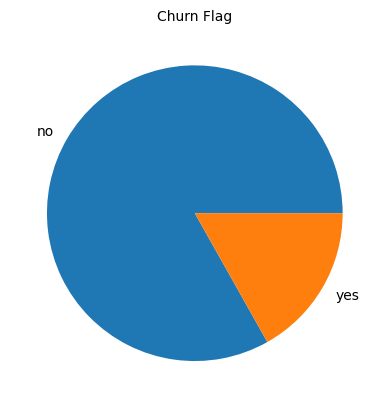

In [15]:
import matplotlib.pyplot as plt

print(df['Churn'].value_counts())

# Plot the Values

# Labels where yes means user churned and no means otherwise.

labels = ("no", "yes")

# Plot a pie chart of values
plt.pie(df['Churn'].value_counts(), labels = labels)

plt.title("Churn Flag", fontsize=10)

plt.show()

# 2. Exploratory Data Analysis

In [16]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


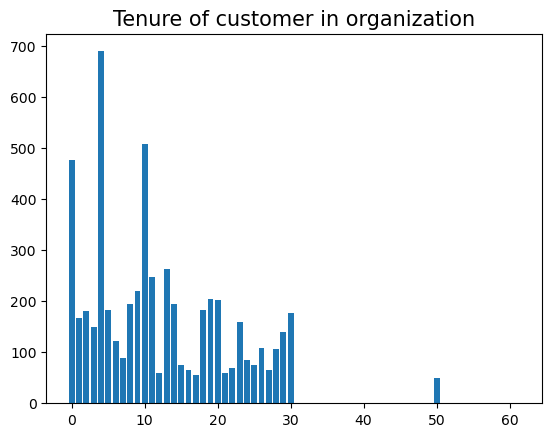

In [17]:
# Column: Tenure

df['Tenure'] = df['Tenure'].astype(int)

plt.bar(df['Tenure'].unique(), df['Tenure'].value_counts())
plt.title("Tenure of customer in organization", fontsize=15)
plt.show()

There is an outlier

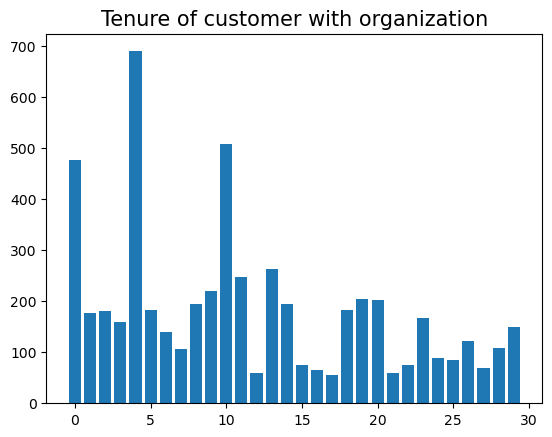

In [18]:
# dropping outliers

df = df[df['Tenure']<30]

# Plotting the result.

plt.bar(df['Tenure'].unique(), df['Tenure'].value_counts())
plt.title("Tenure of customer with organization", fontsize=15)
plt.show()

Mobile Phone    2687
Computer        1608
Phone           1216
Name: PreferredLoginDevice, dtype: int64


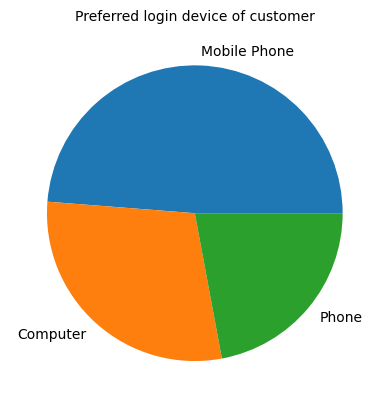

In [19]:
# Column: 'PreferredLoginDevice'

print(df['PreferredLoginDevice'].value_counts())

# Plot Value in PIE

plt.pie(df['PreferredLoginDevice'].value_counts(), labels = df['PreferredLoginDevice'].value_counts().index)
plt.title("Preferred login device of customer", fontsize=10)
plt.show()

Mobile Phone is the same thing as Phone

/var/folders/5d/4ww68fdd0jv13pl8b7z1wbh80000gn/T/ipykernel_93316/2974339802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Mobile Phone', 'Phone')


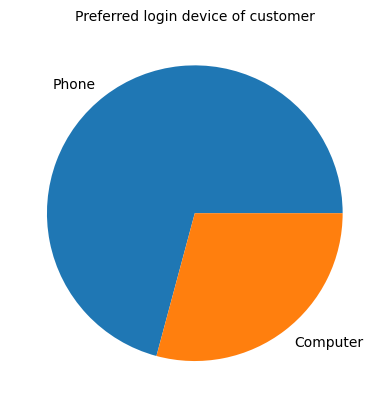

In [20]:
# Combining Vlaue and replotting Graph

df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Mobile Phone', 'Phone')

plt.pie(df['PreferredLoginDevice'].value_counts(), labels = df['PreferredLoginDevice'].value_counts().index)
plt.title("Preferred login device of customer", fontsize=10)
plt.show()

1    3595
3    1680
2     236
Name: CityTier, dtype: int64


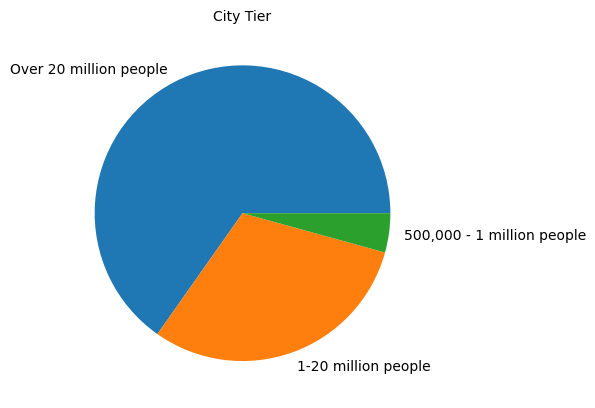

In [21]:
# Column: 'City tier'

print(df['CityTier'].value_counts())

plt.pie(df['CityTier'].value_counts(), labels = ("Over 20 million people", "1-20 million people", "500,000 - 1 million people"))
plt.title("City Tier", fontsize=10)
plt.show()

/var/folders/5d/4ww68fdd0jv13pl8b7z1wbh80000gn/T/ipykernel_93316/1167077076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WarehouseToHome'] = df['WarehouseToHome'].astype('int')


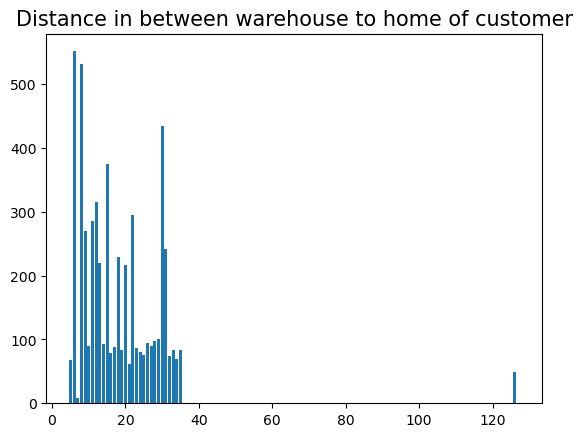

In [22]:
# Column: 'WarehouseToHome'
df['WarehouseToHome'] = df['WarehouseToHome'].astype('int')

plt.bar(df['WarehouseToHome'].unique(), df['WarehouseToHome'].value_counts())
plt.title("Distance in between warehouse to home of customer", fontsize=15)
plt.show()

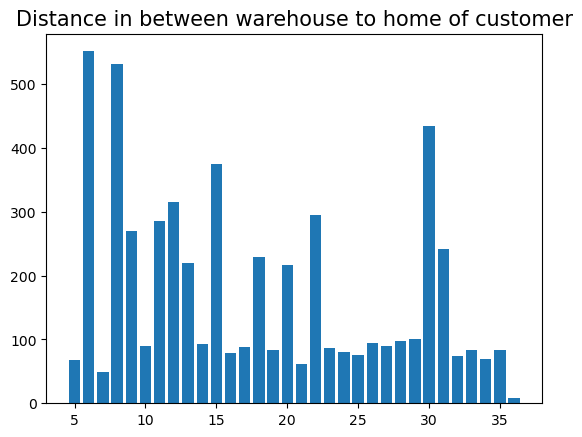

In [23]:
# dropping outliers

df = df[df['WarehouseToHome']<40]

plt.bar(df['WarehouseToHome'].unique(), df['WarehouseToHome'].value_counts())
plt.title("Distance in between warehouse to home of customer", fontsize=15)
plt.show()

In [24]:
# Column: PreferredPaymentMode

df['PreferredPaymentMode'].value_counts()

Debit Card          2257
Credit Card         1470
E wallet             596
UPI                  412
COD                  365
CC                   270
Cash on Delivery     139
Name: PreferredPaymentMode, dtype: int64

The 'CC' is the abreviation of "Credit Card", and 'COD' is the abbreviation of "Cash on Delivery"

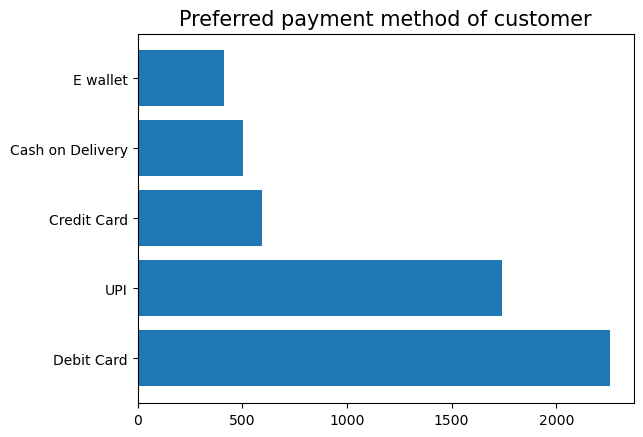

In [25]:
# Combine Values
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].str.replace('CC', 'Credit Card', n=1).str.replace('COD', 'Cash on Delivery', n=1).astype('str')

plt.barh(df['PreferredPaymentMode'].unique(), df['PreferredPaymentMode'].value_counts())
plt.title("Preferred payment method of customer", fontsize=15)
plt.show()

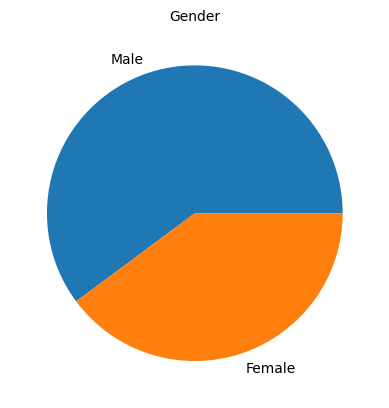

In [26]:
# Column: Gender

plt.pie(df['Gender'].value_counts(), labels = df['Gender'].value_counts().index)
plt.title("Gender", fontsize=10)
plt.show()

In [27]:
# Column: HourSpendOnApp

df['HourSpendOnApp'] = df['HourSpendOnApp'].astype('int')
df['HourSpendOnApp'].value_counts()

3    2626
2    1697
4    1146
1      35
0       3
5       2
Name: HourSpendOnApp, dtype: int64

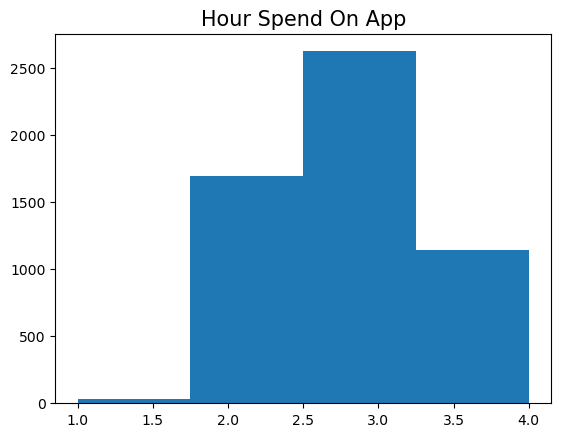

In [28]:
# dropping outliers

df = df[df['HourSpendOnApp']>0]
df = df[df['HourSpendOnApp']<5]

plt.hist(df['HourSpendOnApp'], bins=4)
plt.title("Hour Spend On App", fontsize=15)
plt.show()

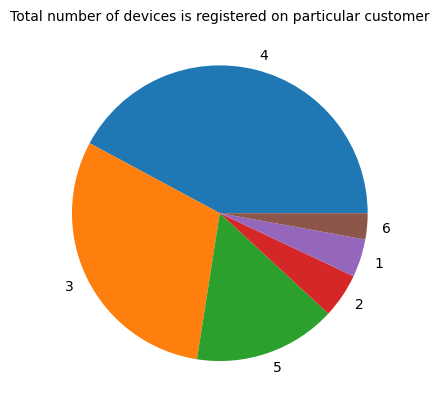

In [29]:
# Column: NumberOfDeviceRegistered

plt.pie(df['NumberOfDeviceRegistered'].value_counts(), labels = df['NumberOfDeviceRegistered'].value_counts().index)
plt.title("Total number of devices is registered on particular customer", fontsize=10)
plt.show()

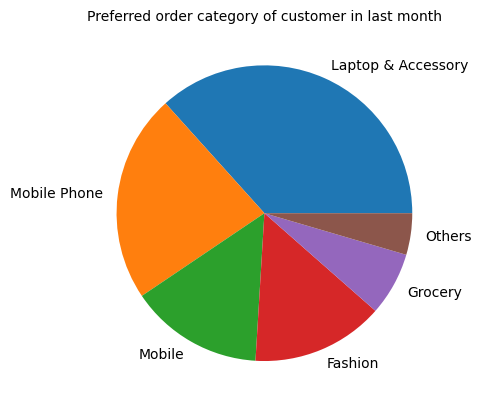

In [30]:
# Column: PreferedOrderCat

plt.pie(df['PreferedOrderCat'].value_counts(), labels = df['PreferedOrderCat'].value_counts().index)
plt.title("Preferred order category of customer in last month", fontsize=10)
plt.show()

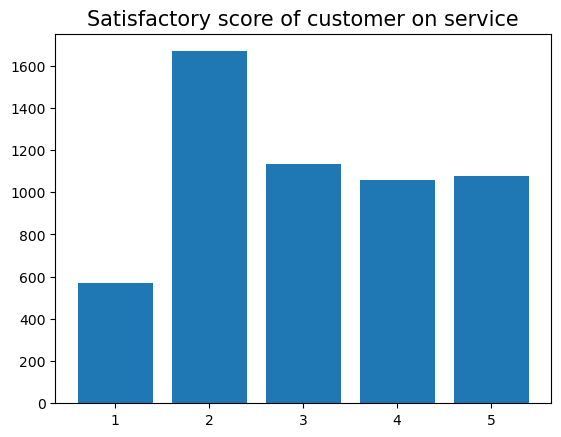

In [31]:
# Column: SatisfactionScore

plt.bar(df['SatisfactionScore'].unique(), df['SatisfactionScore'].value_counts())
plt.title("Satisfactory score of customer on service", fontsize=15)
plt.show()

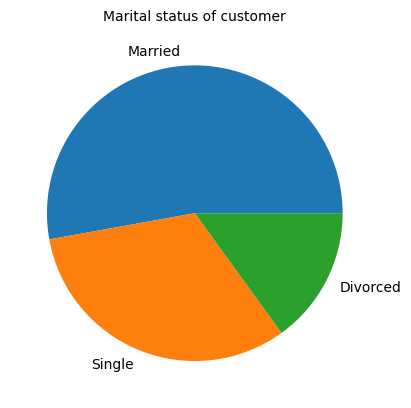

In [32]:
# Column: MaritalStatus

plt.pie(df['MaritalStatus'].value_counts(), labels = df['MaritalStatus'].value_counts().index)
plt.title("Marital status of customer", fontsize=10)
plt.show()

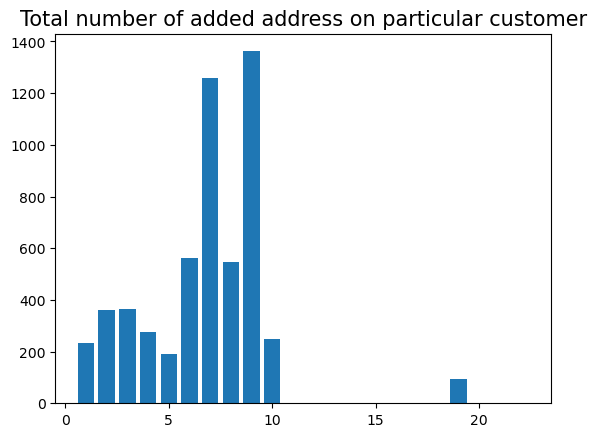

In [33]:
# Column: NumberOfAddress

plt.bar(df['NumberOfAddress'].unique(), df['NumberOfAddress'].value_counts())
plt.title("Total number of added address on particular customer", fontsize=15)
plt.show()

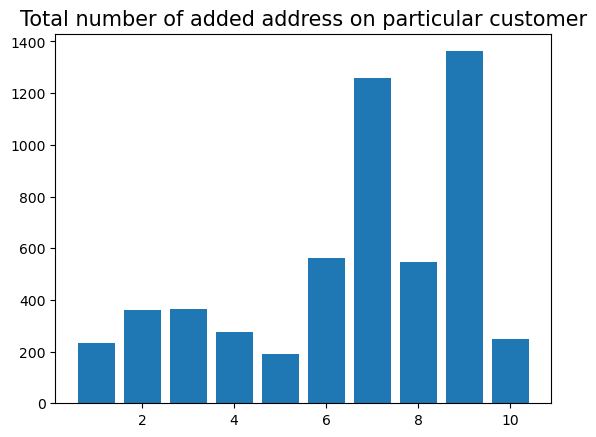

In [34]:
# dropping outliers

df = df[df['NumberOfAddress']<11]

# after dropping outliers

plt.bar(df['NumberOfAddress'].unique(), df['NumberOfAddress'].value_counts())
plt.title("Total number of added address on particular customer", fontsize=15)
plt.show()

In [35]:
# Column: Complain

df['Complain'].value_counts().to_frame()

,Complain
0,3880
1,1525


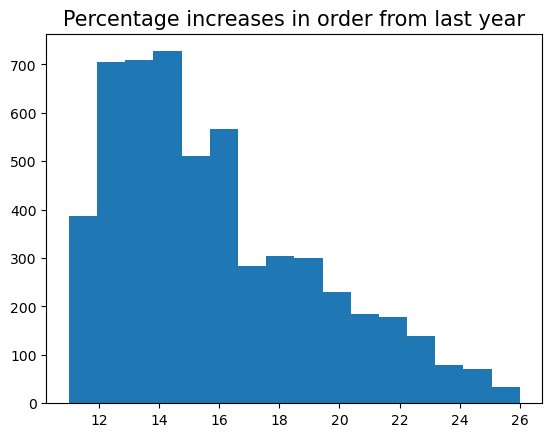

In [36]:
# Percentage increases in order from last year

plt.hist(df['OrderAmountHikeFromlastYear'], bins=16)
plt.title('Percentage increases in order from last year', fontsize=15)
plt.show()

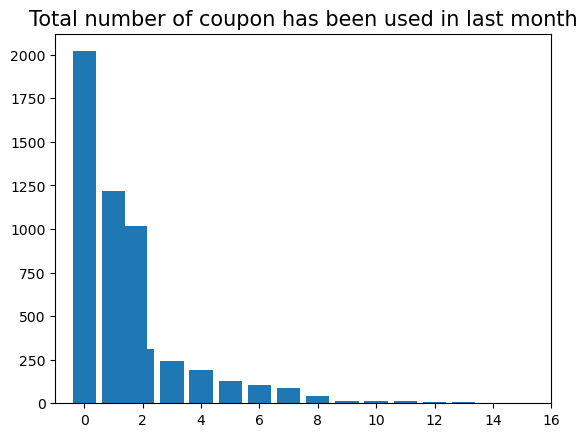

In [37]:
# Coupon Used

plt.bar(df['CouponUsed'].value_counts().index.sort_values(), df['CouponUsed'].value_counts())
plt.xlim(-1,16)
plt.title("Total number of coupon has been used in last month", fontsize=15)
plt.show()

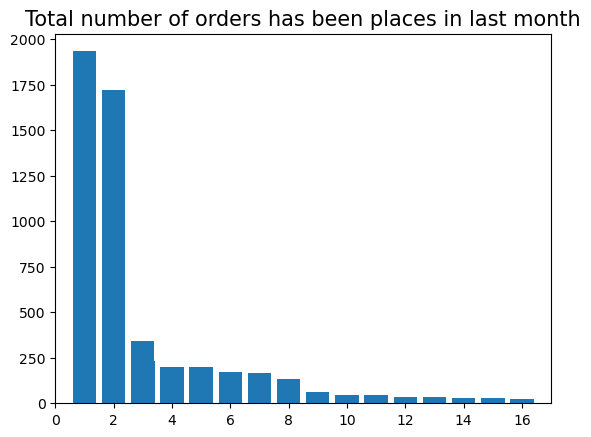

In [38]:
# Number of Orders since last year

plt.bar(df['OrderCount'].value_counts().index.sort_values(), df['OrderCount'].value_counts())
plt.xlim(0,17)
plt.title("Total number of orders has been places in last month", fontsize=15)
plt.show()

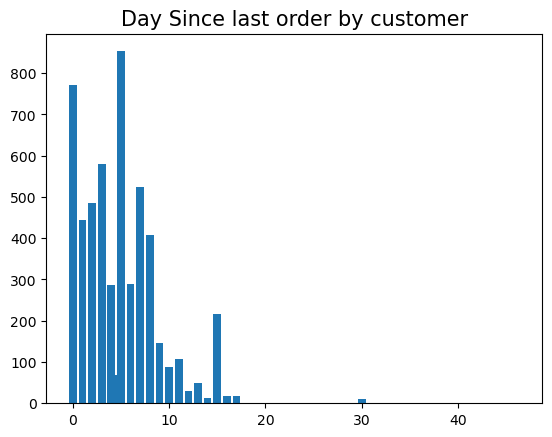

In [39]:
#Column: DaySinceLastOrder 

df['DaySinceLastOrder'].value_counts()

#Day Since last order by customer

plt.bar(df['DaySinceLastOrder'].unique(), df['DaySinceLastOrder'].value_counts())
plt.title("Day Since last order by customer", fontsize=15)
plt.show()

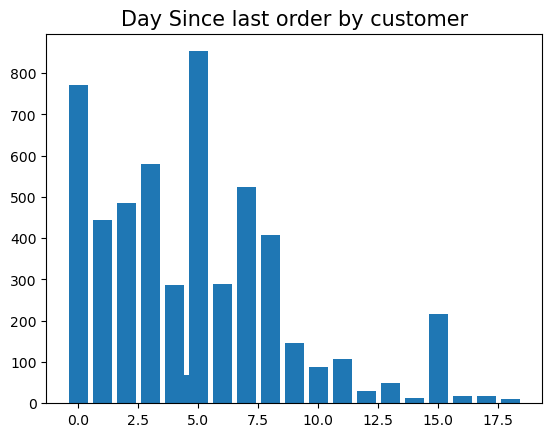

In [40]:
# dropping outliers

df = df[df['DaySinceLastOrder']<20]

plt.bar(df['DaySinceLastOrder'].unique(), df['DaySinceLastOrder'].value_counts())
plt.title("Day Since last order by customer", fontsize=15)
plt.show()


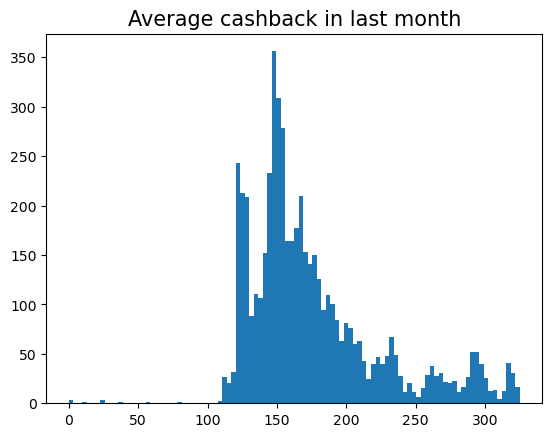

In [41]:
# Cashback Amount

plt.hist(df['CashbackAmount'], bins=100)
plt.title('Average cashback in last month', fontsize=15)
plt.show()

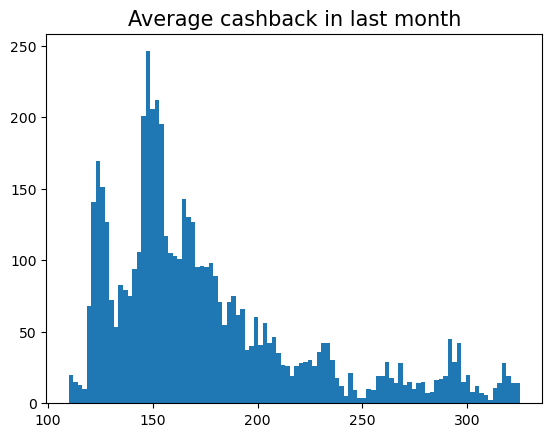

In [42]:
# dropping outliers

df = df[df['CashbackAmount']>100]

plt.hist(df['CashbackAmount'], bins=100)
plt.title('Average cashback in last month', fontsize=15)
plt.show()

In [43]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4,Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,10,Phone,1,8,UPI,Male,3,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,10,Phone,1,30,Debit Card,Male,2,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0,Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0,Phone,1,12,Credit Card,Male,2,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5392 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5392 non-null   int64  
 1   Tenure                       5392 non-null   int64  
 2   PreferredLoginDevice         5392 non-null   object 
 3   CityTier                     5392 non-null   int64  
 4   WarehouseToHome              5392 non-null   int64  
 5   PreferredPaymentMode         5392 non-null   object 
 6   Gender                       5392 non-null   object 
 7   HourSpendOnApp               5392 non-null   int64  
 8   NumberOfDeviceRegistered     5392 non-null   int64  
 9   PreferedOrderCat             5392 non-null   object 
 10  SatisfactionScore            5392 non-null   int64  
 11  MaritalStatus                5392 non-null   object 
 12  NumberOfAddress              5392 non-null   int64  
 13  Complain          

# 3. Feature Engineering and Models Selection

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [46]:
# Encode categorical variables
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [47]:
import seaborn as sns
df_corr = df.corr(method = 'pearson')

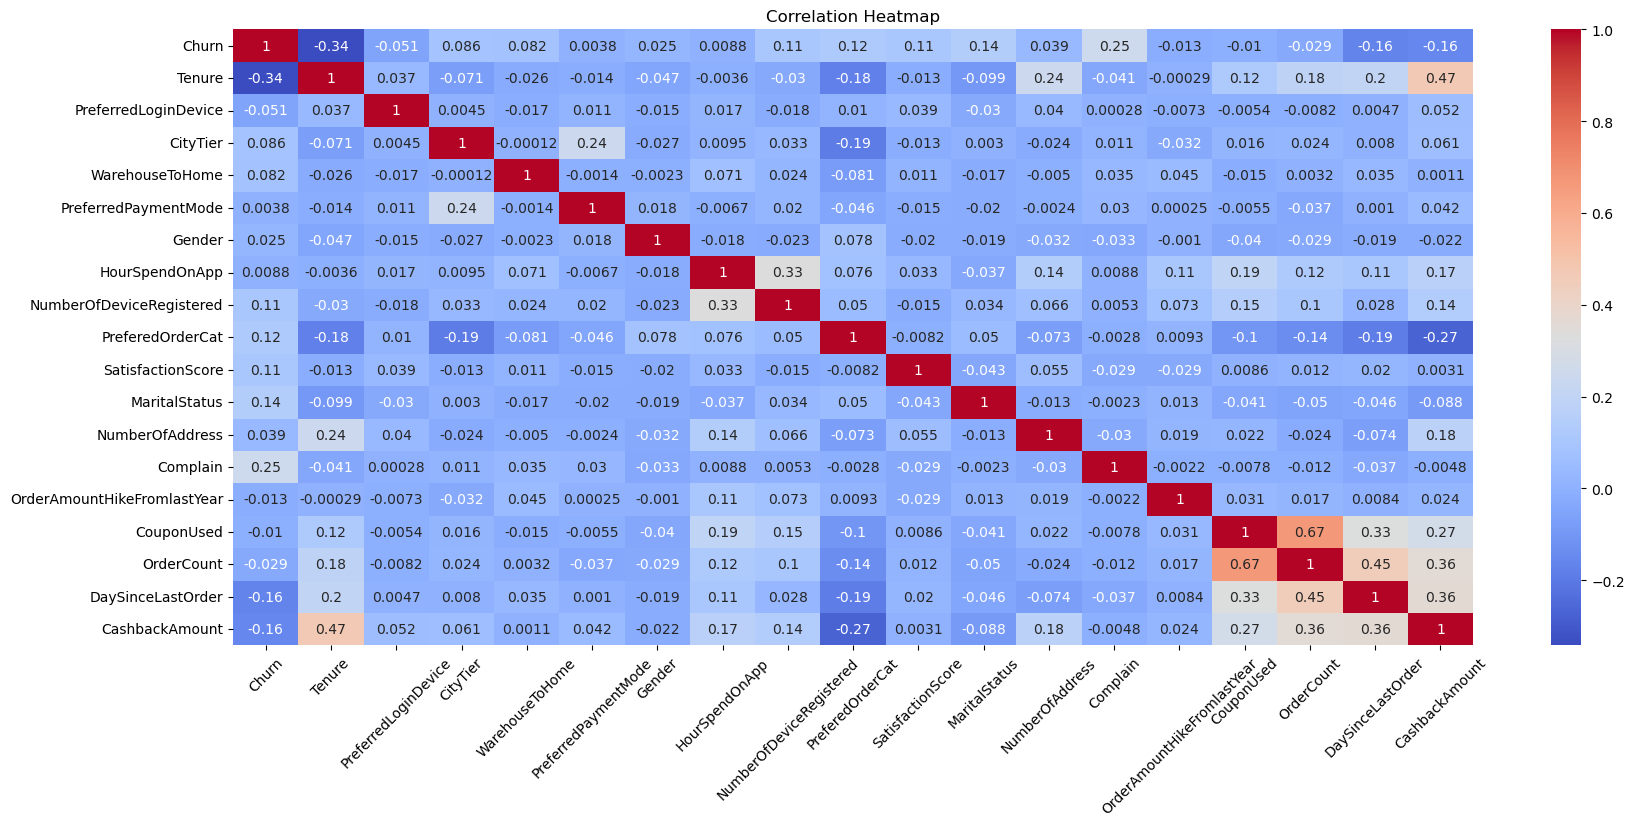

In [48]:
# Create the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

# Customize the plot
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [49]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [51]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

# 3.1 Benchmark: Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
steps = [('rescale', MinMaxScaler()),
        ('logreg', LogisticRegression())]
model = Pipeline(steps)
model_logreg = model.fit(X_train, y_train)

In [112]:
y_train_pred = model_logreg.predict(X_train)
y_test_pred = model_logreg.predict(X_test)

In [113]:
print(classification_report(y_train, y_train_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3121
           1       0.75      0.46      0.57       653

    accuracy                           0.88      3774
   macro avg       0.82      0.71      0.75      3774
weighted avg       0.87      0.88      0.87      3774



In [56]:
print(classification_report(y_test, y_test_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1349
           1       0.72      0.44      0.55       269

    accuracy                           0.88      1618
   macro avg       0.81      0.70      0.74      1618
weighted avg       0.87      0.88      0.87      1618



In [57]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)
#[TN,FP]
#[FN,TP]

array([[3022,   99],
       [ 355,  298]])

In [58]:
confusion_matrix(y_test, y_test_pred)

array([[1303,   46],
       [ 150,  119]])

In [59]:
# Define the assumed incomes and costs for TP and FP categories
income_TP = 100  # assumed income for True Positive (correctly predicted churn)
cost_FP = 50    # assumed cost for False Positive (incorrectly predicted churn)

# Calculate the number of customers in each category based on intervention level
customers_TP = 1304 * 100 - 1304 * 50 # True Positives
customers_FP = 45 * 100  # False Positives
customers_TN = 0  # True Negatives (assumed to be zero)
customers_FN = 101 *50  # False Negatives

# Calculate the total profitability
total_profit = customers_TP - customers_FP - customers_FN

In [60]:
print (f'total_profit:  ${total_profit}')

total_profit:  $55650


# Probability of train and test data

In [61]:
# Predict probabilities for a the sample
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

# Print the predicted probabilities for each class
print("y_traing Class probabilities:", y_train_proba)
print("y_test Class probabilities:", y_test_proba)

y_traing Class probabilities: [[0.97265842 0.02734158]
 [0.86725959 0.13274041]
 [0.75903535 0.24096465]
 ...
 [0.4369692  0.5630308 ]
 [0.99350889 0.00649111]
 [0.88319269 0.11680731]]
y_test Class probabilities: [[0.93887794 0.06112206]
 [0.58568905 0.41431095]
 [0.99389675 0.00610325]
 ...
 [0.96215487 0.03784513]
 [0.90642213 0.09357787]
 [0.51165125 0.48834875]]


# Calculate the train and test roc_auc_scores.

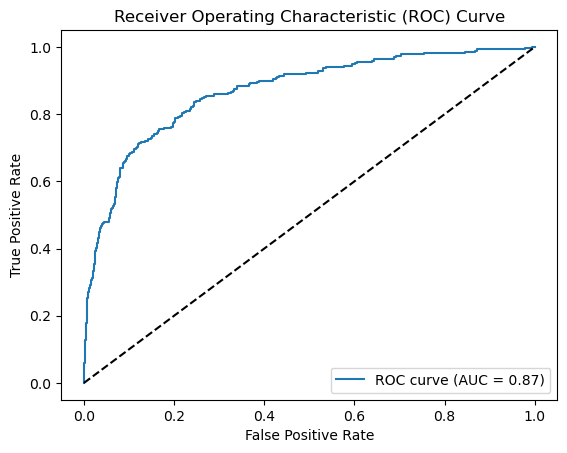

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics

# Assuming you have the true labels (y_true) and predicted probabilities (y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:, 1])

# Calculate the AUC score
auc = roc_auc_score(y_test, y_test_proba[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 3.2 Decision Trees

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
steps = [('rescale', MinMaxScaler()),
        ('dectr', DecisionTreeClassifier())]
model = Pipeline(steps)
model_dt = model.fit(X_train, y_train)

In [66]:
y_train_pred = model_dt.predict(X_train)
y_test_pred = model_dt.predict(X_test)

In [67]:
print(classification_report(y_train, y_train_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3121
           1       1.00      1.00      1.00       653

    accuracy                           1.00      3774
   macro avg       1.00      1.00      1.00      3774
weighted avg       1.00      1.00      1.00      3774



In [68]:
print(classification_report(y_test, y_test_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1349
           1       0.76      0.87      0.81       269

    accuracy                           0.93      1618
   macro avg       0.87      0.91      0.89      1618
weighted avg       0.94      0.93      0.94      1618



# ROC AUC score without calibration wrapper

In [69]:
# Predict probabilities for a the sample
y_train_proba = model_dt.predict_proba(X_train)
y_test_proba = model_dt.predict_proba(X_test)

# Print the predicted probabilities for each class
print("y_traing Class probabilities:", y_train_proba)
print("y_test Class probabilities:", y_test_proba)

y_traing Class probabilities: [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
y_test Class probabilities: [[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


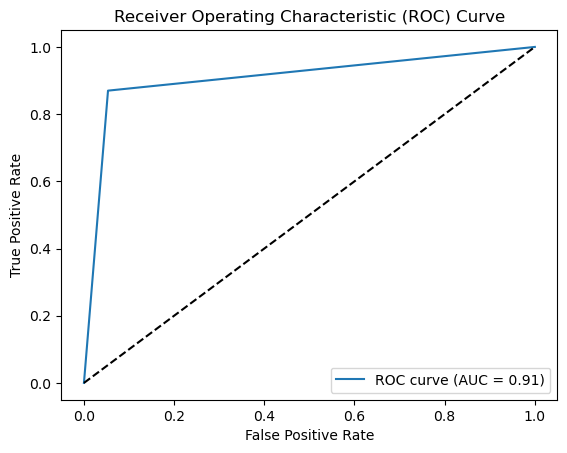

In [70]:
from sklearn import metrics
from sklearn.metrics import roc_curve

# Assuming you have the true labels (y_true) and predicted probabilities (y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:, 1])

# Calculate the AUC score
auc = roc_auc_score(y_test, y_test_proba[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Hyperparameters tunning

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [73]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [74]:
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [75]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [76]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9271326435610519


In [77]:
# Create a new decision tree classifier object with the best parameters
best_tree_model = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'],
                                         min_samples_split=grid_search.best_params_['min_samples_split'],
                                         min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

# Train the decision tree model using your training data
best_tree_model.fit(X_train, y_train)

# Use the trained model for predictions
y_test_pred = best_tree_model.predict(X_test)

In [78]:
# Predict probabilities for the sample
y_train_proba = best_tree_model.predict_proba(X_train)
y_test_proba = best_tree_model.predict_proba(X_test)

# Print the predicted probabilities for each class
print("y_traing Class probabilities:", y_train_proba)
print("y_test Class probabilities:", y_test_proba)

y_traing Class probabilities: [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
y_test Class probabilities: [[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


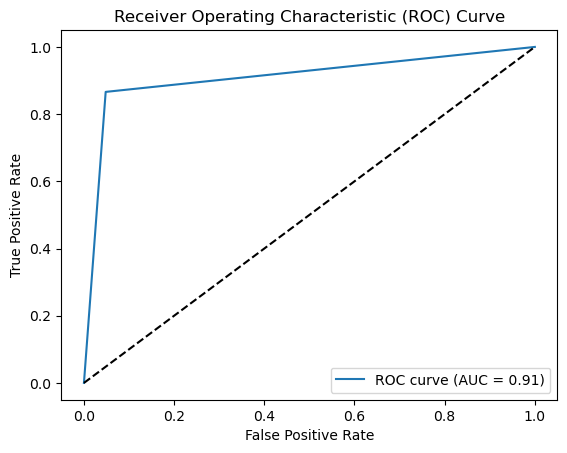

In [79]:
from sklearn import metrics
from sklearn.metrics import roc_curve

# Assuming you have the true labels (y_true) and predicted probabilities (y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:, 1])

# Calculate the AUC score
auc = roc_auc_score(y_test, y_test_proba[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# ROC AUC score with calibration wrapper

In [81]:
from sklearn.calibration import CalibratedClassifierCV

In [82]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)
clf_isotonic = CalibratedClassifierCV(clf, method='isotonic')
clf_isotonic.fit(X_train, y_train)
predictions_isotonic = clf_isotonic.predict_proba(X_test)

In [83]:
# Print the predicted probabilities for each class
print("y_test Class probabilities:", predictions_isotonic)

y_test Class probabilities: [[0.95791984 0.04208016]
 [0.2189037  0.7810963 ]
 [0.95791984 0.04208016]
 ...
 [0.95791984 0.04208016]
 [0.95791984 0.04208016]
 [0.2189037  0.7810963 ]]


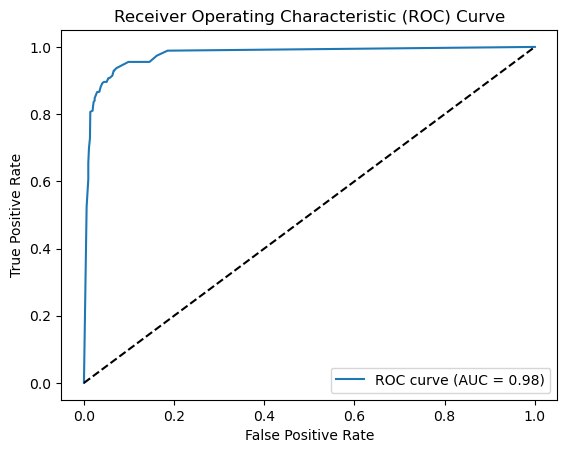

In [84]:
# Assuming you have the true labels (y_true) and predicted probabilities (y_proba)
fpr, tpr, thresholds = roc_curve(y_test, predictions_isotonic[:, 1])

# Calculate the AUC score
auc = roc_auc_score(y_test, predictions_isotonic[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC AUC score was improved by calibration wrapper

# 3.3 Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
steps = [('rescale', MinMaxScaler()),
        ('ranfor', RandomForestClassifier(n_estimators=100, random_state=42))]
model = Pipeline(steps)
model_rf = model.fit(X_train, y_train)

In [87]:
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

In [88]:
print(classification_report(y_train, y_train_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3121
           1       1.00      1.00      1.00       653

    accuracy                           1.00      3774
   macro avg       1.00      1.00      1.00      3774
weighted avg       1.00      1.00      1.00      3774



In [89]:
print(classification_report(y_test, y_test_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1349
           1       0.89      0.87      0.88       269

    accuracy                           0.96      1618
   macro avg       0.93      0.92      0.93      1618
weighted avg       0.96      0.96      0.96      1618



In [90]:
# Predict probabilities for a the sample
y_train_proba = model_rf.predict_proba(X_train)
y_test_proba = model_rf.predict_proba(X_test)

# Print the predicted probabilities for each class
print("y_traing Class probabilities:", y_train_proba)
print("y_test Class probabilities:", y_test_proba)

y_traing Class probabilities: [[1.   0.  ]
 [0.97 0.03]
 [0.99 0.01]
 ...
 [0.03 0.97]
 [0.99 0.01]
 [0.9  0.1 ]]
y_test Class probabilities: [[0.99 0.01]
 [0.12 0.88]
 [1.   0.  ]
 ...
 [0.99 0.01]
 [0.99 0.01]
 [0.3  0.7 ]]


In [91]:
confusion_matrix(y_test, y_test_pred)

array([[1320,   29],
       [  36,  233]])

In [92]:
# Define the assumed incomes and costs for TP and FP categories
income_TP = 100  # assumed income for True Positive (correctly predicted churn)
cost_FP = 50    # assumed cost for False Positive (incorrectly predicted churn)

# Calculate the number of customers in each category based on intervention level
customers_TP = 1320 * 100 - 1320 * 50 # True Positives
customers_FP = 29 * 100  # False Positives
customers_TN = 0  # True Negatives (assumed to be zero)
customers_FN = 36 *50  # False Negatives

# Calculate the total profitability
total_profit = customers_TP - customers_FP - customers_FN

In [93]:
total_profit

61300

Feature Importance

                        Feature  Importance
0                        Tenure    0.221770
17               CashbackAmount    0.108801
3               WarehouseToHome    0.074436
16            DaySinceLastOrder    0.064622
12                     Complain    0.064155
11              NumberOfAddress    0.063642
13  OrderAmountHikeFromlastYear    0.059676
9             SatisfactionScore    0.048737
4          PreferredPaymentMode    0.042015
8              PreferedOrderCat    0.039941
7      NumberOfDeviceRegistered    0.036625
10                MaritalStatus    0.034324
15                   OrderCount    0.034282
14                   CouponUsed    0.029225
2                      CityTier    0.021995
6                HourSpendOnApp    0.020248
5                        Gender    0.018669
1          PreferredLoginDevice    0.016839


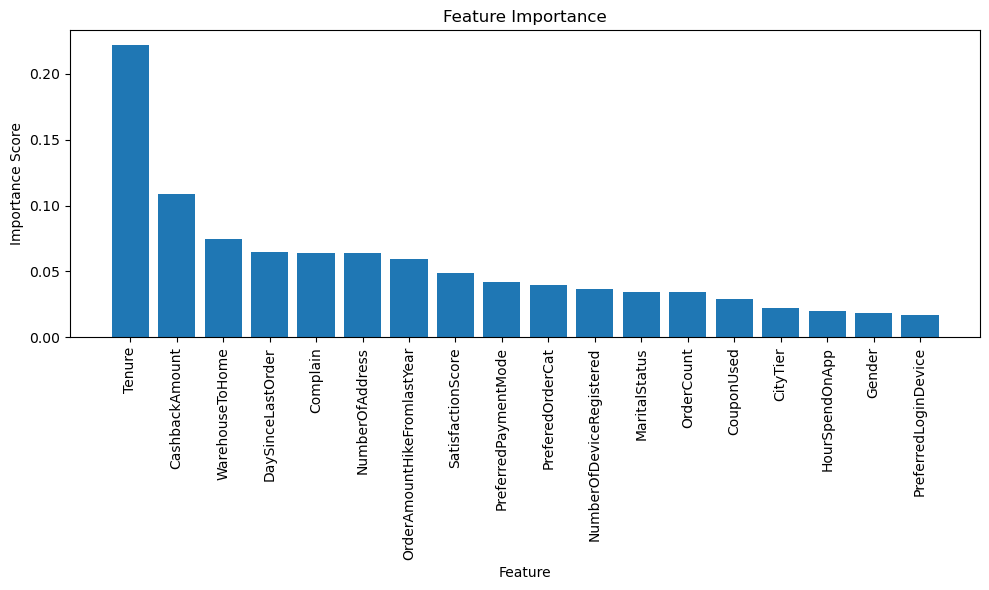

In [96]:
# Access the Random Forest classifier step within the pipeline
ranfor_classifier = model_rf.named_steps['ranfor']

# Get feature importance scores from the Random Forest classifier
importance_scores = ranfor_classifier.feature_importances_

# Create a dataframe with feature names and importance scores
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the features by importance score
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Print the feature importance table
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

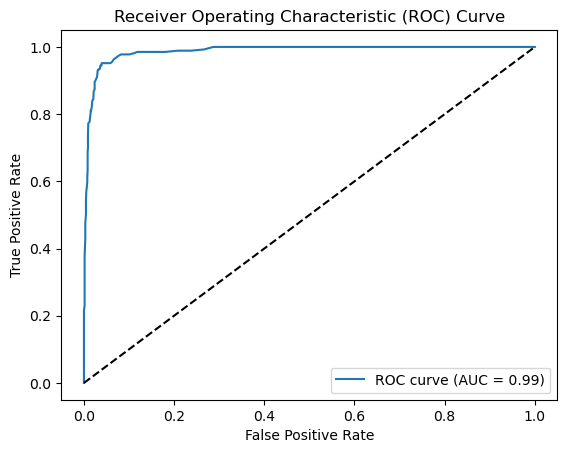

In [97]:
from sklearn import metrics
from sklearn.metrics import roc_curve

# Assuming you have the true labels (y_true) and predicted probabilities (y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:, 1])

# Calculate the AUC score
auc = roc_auc_score(y_test, y_test_proba[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# ROC AUC score with calibration wrapper

In [98]:
clf = RandomForestClassifier(max_depth=3, random_state=0, min_samples_leaf=3)
clf_isotonic = CalibratedClassifierCV(clf, method='isotonic')
clf_isotonic.fit(X_train, y_train)
predictions_isotonic = clf_isotonic.predict_proba(X_test)

In [99]:
# Print the predicted probabilities for each class
print("y_test Class probabilities:", predictions_isotonic)

y_test Class probabilities: [[0.97817821 0.02182179]
 [0.38233037 0.61766963]
 [0.97287701 0.02712299]
 ...
 [0.96748485 0.03251515]
 [0.96748485 0.03251515]
 [0.2193206  0.7806794 ]]


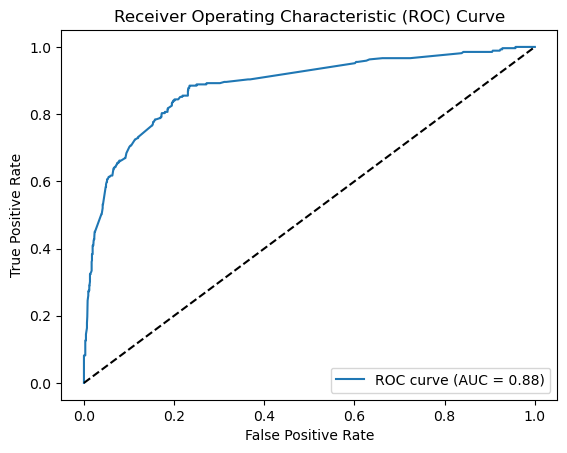

In [100]:
# Assuming you have the true labels (y_true) and predicted probabilities (y_proba)
fpr, tpr, thresholds = roc_curve(y_test, predictions_isotonic[:, 1])

# Calculate the AUC score
auc = roc_auc_score(y_test, predictions_isotonic[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC AUC score was not improved by calibration wrapper

# 3.4 XGBoost

In [101]:
from xgboost.sklearn import XGBClassifier

In [102]:
steps = [('rescale', MinMaxScaler()),
        ('xgboost', XGBClassifier(objective='binary:logistic',
    max_depth=3,
    learning_rate=0.1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8))]
model = Pipeline(steps)
model_xgb = model.fit(X_train, y_train)

In [103]:
y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

In [104]:
print(classification_report(y_train, y_train_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3121
           1       0.89      0.70      0.78       653

    accuracy                           0.93      3774
   macro avg       0.91      0.84      0.87      3774
weighted avg       0.93      0.93      0.93      3774



In [105]:
print(classification_report(y_test, y_test_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1349
           1       0.79      0.62      0.70       269

    accuracy                           0.91      1618
   macro avg       0.86      0.80      0.82      1618
weighted avg       0.90      0.91      0.91      1618



In [106]:
# Predict probabilities for a the sample
y_train_proba = model_xgb.predict_proba(X_train)
y_test_proba = model_xgb.predict_proba(X_test)

# Print the predicted probabilities for each class
print("y_traing Class probabilities:", y_train_proba)
print("y_test Class probabilities:", y_test_proba)

y_traing Class probabilities: [[0.98704815 0.01295188]
 [0.939812   0.060188  ]
 [0.9568456  0.0431544 ]
 ...
 [0.41123575 0.58876425]
 [0.9954546  0.0045454 ]
 [0.81052005 0.18947995]]
y_test Class probabilities: [[0.97609735 0.02390266]
 [0.36979407 0.6302059 ]
 [0.98467904 0.01532096]
 ...
 [0.9703804  0.02961957]
 [0.9400913  0.05990871]
 [0.09939206 0.90060794]]


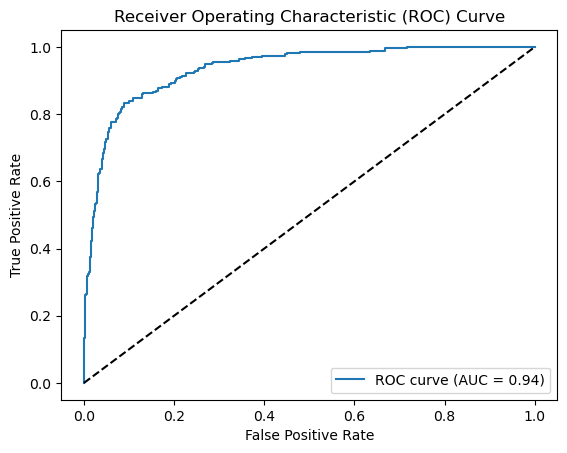

In [107]:
from sklearn import metrics
from sklearn.metrics import roc_curve

# Assuming you have the true labels (y_true) and predicted probabilities (y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:, 1])

# Calculate the AUC score
auc = roc_auc_score(y_test, y_test_proba[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [118]:
def revenue_calculator(y_true, y_pred,ratio):
    y_true = list(y_true)
    y_pred = list(y_pred)
    rev = 0
    for i in range(len(y_true)):

        if int(y_true[i]) == 1 and int(y_pred[i]) == 1:
            rev += (ratio - 1)
        elif int(y_true[i]) == 0 and int(y_pred[i]) == 1:
            rev -= 1
        elif int(y_true[i]) == 1 and int(y_pred[i]) == 0:
            rev -= (ratio - 1)

    return rev

when ratio is:  1


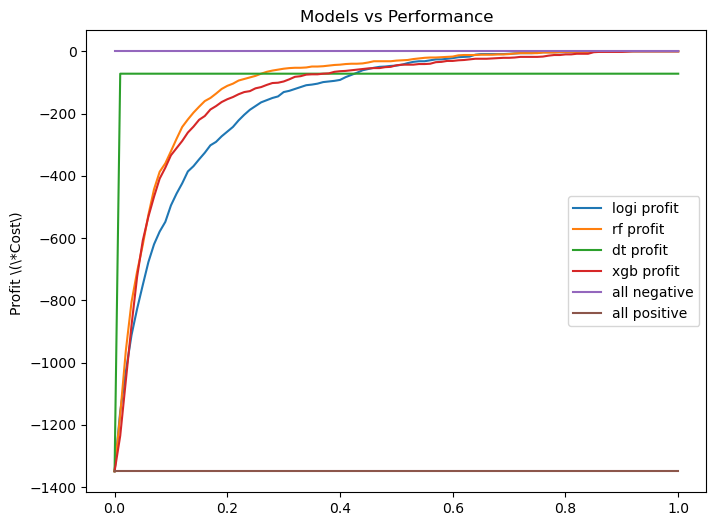

when ratio is:  1.5


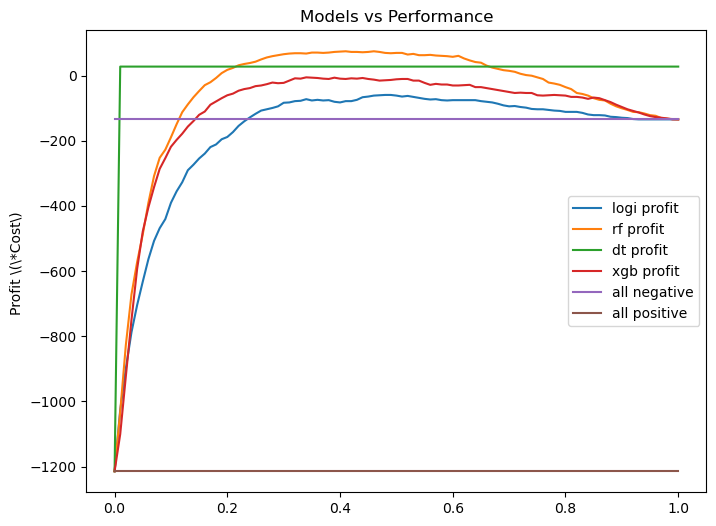

when ratio is:  2


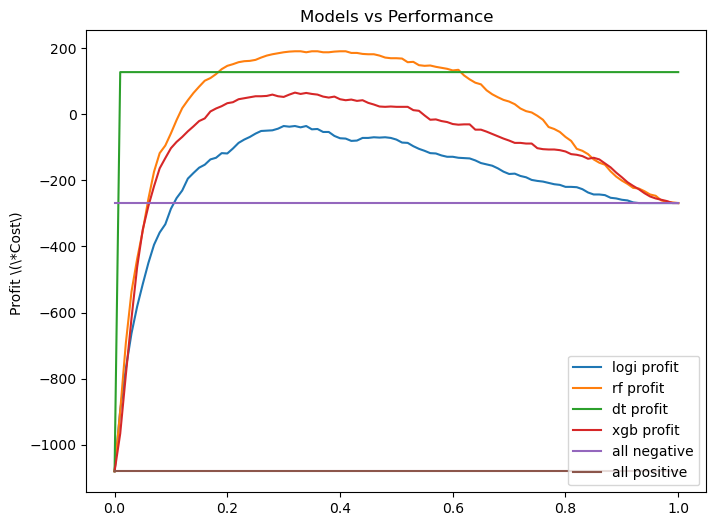

when ratio is:  2.5


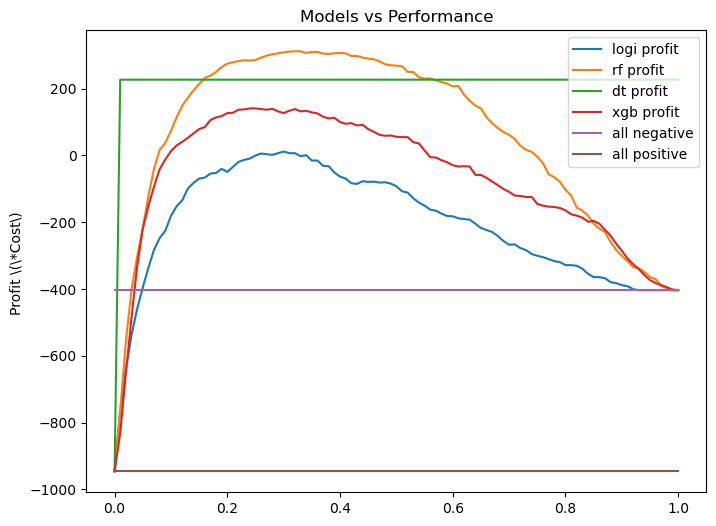

when ratio is:  3


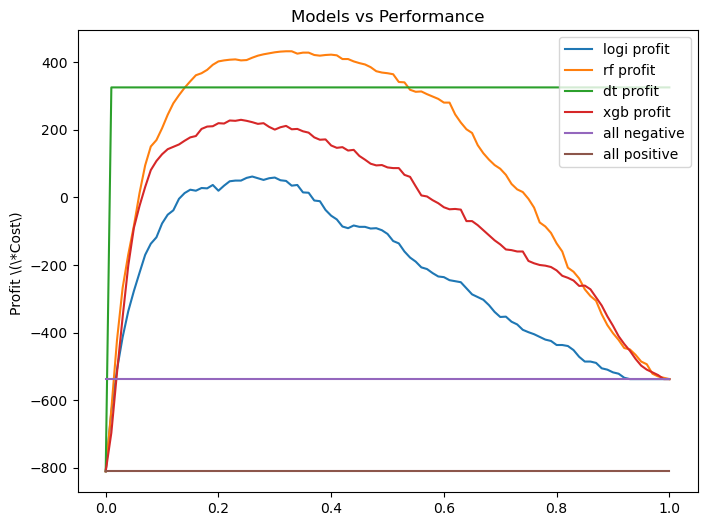

when ratio is:  3.5


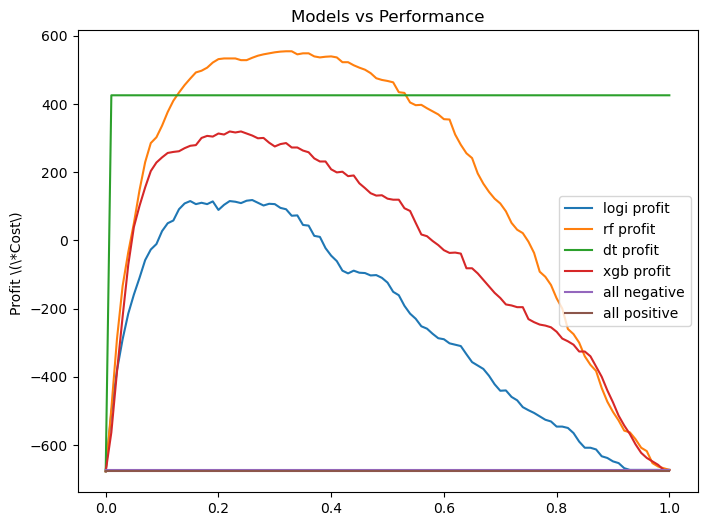

when ratio is:  4


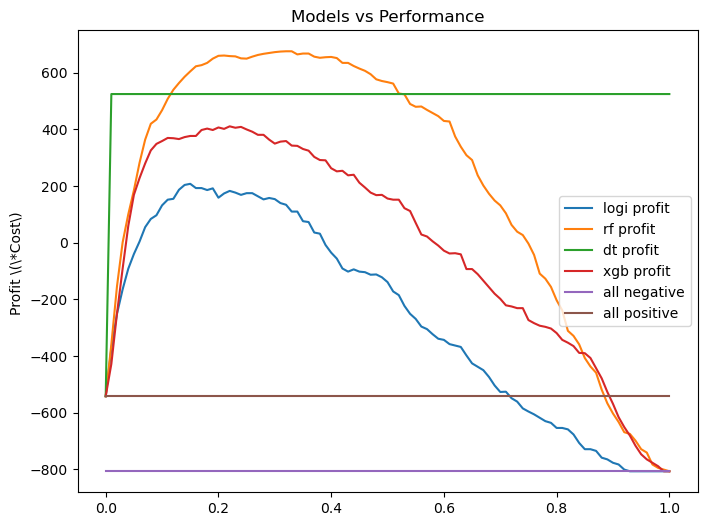

when ratio is:  4.5


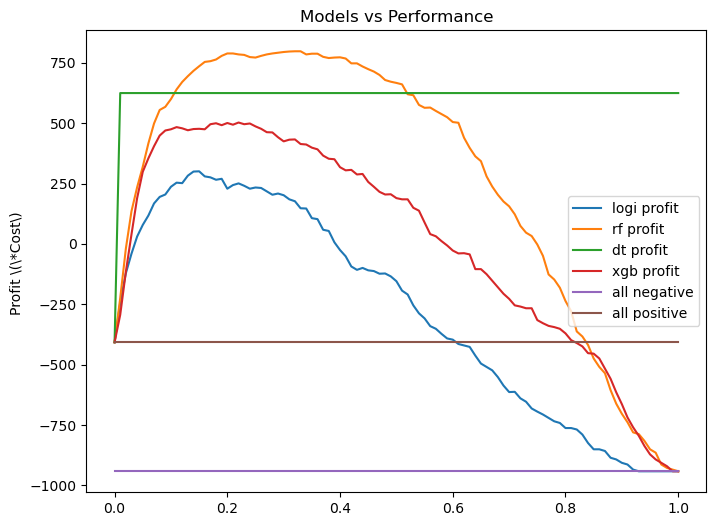

when ratio is:  5


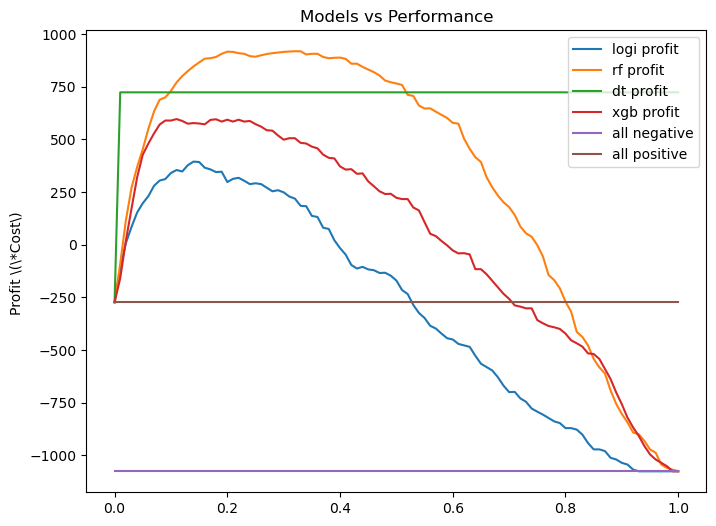

when ratio is:  10


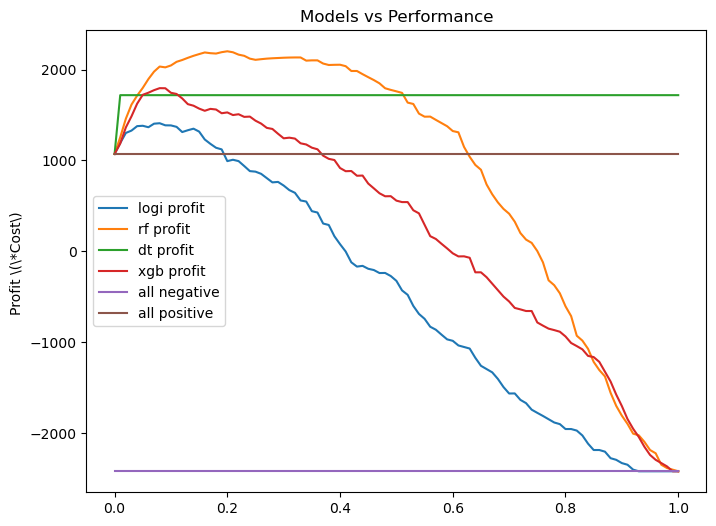

when ratio is:  50


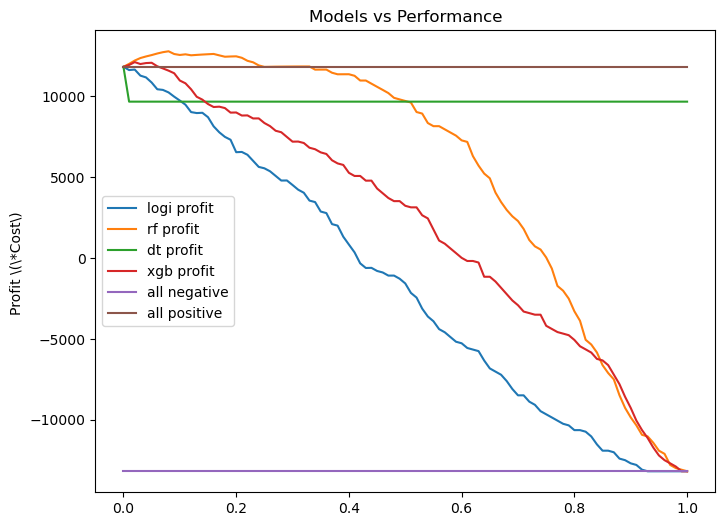

when ratio is:  100


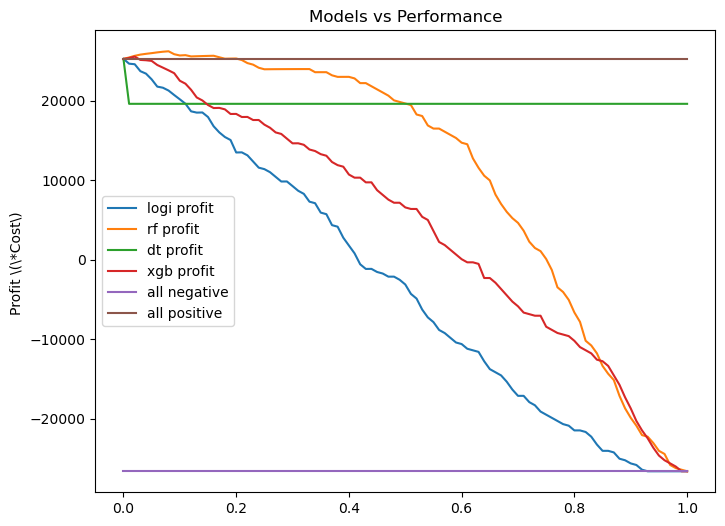

In [122]:
from collections import Counter# The following need to be optimized

proba_positive_logreg= model_logreg.predict_proba(X_test)[:, 1]
proba_positive_dt = model_dt.predict_proba(X_test)[:, 1]
proba_positive_rf = model_rf.predict_proba(X_test)[:, 1]
proba_positive_xgb = model_xgb.predict_proba(X_test)[:, 1]
y_all_negative = [0]*len(y_test)
y_all_positive = [1]*len(y_test)
counts = Counter(list(y_test))
for ratio in [1, 1.5, 2, 2.5,3,3.5,4,4.5,5,10,50,100]:    
    revenues_rf = []
    revenues_dt = []
    revenues_xgb = []
    revenues_logreg = []
    revenues_all_negative = []
    revenues_all_positive = []
#     revenues_random = []
#     recalls = []
#     precisions = []
#     f1s = []
#     roc_aucs = []
    for threshold in range(101):
        threshold = threshold/100
        adjusted_predictions_logreg = np.where(proba_positive_logreg >= threshold, 1, 0)
        adjusted_predictions_dt = np.where(proba_positive_dt >= threshold, 1, 0)
        adjusted_predictions_rf = np.where(proba_positive_rf >= threshold, 1, 0)
        adjusted_predictions_xgb = np.where(proba_positive_xgb >= threshold, 1, 0)
        rev_logreg = revenue_calculator(y_test, adjusted_predictions_logreg,ratio)
        rev_dt = revenue_calculator(y_test, adjusted_predictions_dt,ratio)
        rev_rf = revenue_calculator(y_test, adjusted_predictions_rf,ratio)
        rev_xgb = revenue_calculator(y_test, adjusted_predictions_xgb,ratio)
#         precision = precision_score(y_test, adjusted_predictions,zero_division=1)
#         recall = recall_score(y_test, adjusted_predictions)
#         TP,FP,TN,FN = term_calculation(adjusted_predictions,y_test)
#         f1 = f1_score(y_test,adjusted_predictions)
#         roc_auc = roc_auc_score(y_test, adjusted_predictions)
        revenues_all_negative.append(revenue_calculator(y_test,y_all_negative,ratio))
        revenues_all_positive.append(revenue_calculator(y_test,y_all_positive,ratio))
#         revenues_random.append((ratio-1)*(counts[1]//2)-(counts[0]//2))
        revenues_logreg.append(rev_logreg)
        revenues_dt.append(rev_dt)
        revenues_rf.append(rev_rf)
        revenues_xgb.append(rev_xgb)
#         recalls.append(recall)
#         precisions.append(precision)
#         roc_aucs.append(roc_auc)
#         f1s.append(f1)    
    print('when ratio is: ',ratio)
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(101) / 100, revenues_logreg, label='logi profit')
    plt.plot(np.arange(101) / 100, revenues_rf, label='rf profit')  
    plt.plot(np.arange(101) / 100, revenues_dt, label='dt profit')
    plt.plot(np.arange(101) / 100, revenues_xgb, label='xgb profit')  
    plt.plot(np.arange(101) / 100, revenues_all_negative, label='all negative')  
    plt.plot(np.arange(101) / 100, revenues_all_positive, label='all positive')  
#     plt.plot(np.arange(101) / 100, revenues_random, label='random profit') 
#     plt.xlabel('threshold')  
  
    plt.ylabel('Profit \(\*Cost\) ')  
    plt.title('Models vs Performance')  
    plt.legend()  
    plt.show()  

# The project ends here

1. Why this project is important? What problem are you trying to solve?

In my current company, we have customers who are contracting with us to support them for making drugs. While some customers have been using our services for a long time, but some of them are churned after a certain of time. Also in today's competitive market, there is an immense variety of products and services to choose from. Accordingly, most consumers got used to walk freely from one brand to another, from one supplier to another, looking for the product or service that suits their needs. The customers discontinued their relationship with the company or stop using its products or services. The customer churn could impact the company revenue. If we could predict the customer churn, we will help the company to retain the existing customers and increase the revenue. The prediction also helps the company to take further actions to prevent the churn.



2. How do you measure the model performance (metrics)? What is the benchmark?

The total profit will be used to measure the model performance. The more profit we make the better the model. 
The ROC-AUC  also can be used for measuring the performance of model. The higher ROC-AUC score, the better the model.
The Logistic Regression model will be used as benchmark.

3. How is your model? Have achieved your goal? How to evaluate the business value of your model?

Answer: The models I built performed well with ROC AUC score of 0.99. The maximum profit is used to evaluate the business value.

4. Any insights have you gotten from your model? Any actionable suggestions can you provide to your business partner?

Definately the tenure would reflect the churn or not churn, which is obvious we would like to keep the customers stay with the business. The other factor to impact the churn is "complain", the company should take care of the Complain issues from the customers and solve these issues to prevent churning in the future.

5. What is the most challenging part in the project? How did you solve it? How will you futher improve your model if you get more resources and time.

The most challenging part of this project is to deploy the model in a production environment. I had conversations and discussions with skateholders to define their needs and problem. I would focus on developing techniques to provide transparency and interpretability in the model's decision-making process. This would help build trust in the model's predictions and facilitate understanding of the factors driving those predictions.

Make sure that your work includes these parts:
1. **Pre-model Analysis**: process and visualize data; get insights of features and target.
2. **Problem Definition**: translate the business needs into machine learning problems; design metrics to measure model performance.
3. **Feature Engineering**: create features which might improve model performance.
4. **Modeling**: Model selection, feature elimination, validation, hyperparameter tuning.
5. **Post-model Analysis**: Model performance, feature importance, actionable suggestions to business.